In [0]:
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [0]:
batch_size = 128
num_classes = 10
epochs = 12

# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)



11493376/11490434 [==============================] - 3s 0us/step
x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


####CNN_MNIST_1

Layer ==> conv2D +  Maxpooling + Conv2D + Maxpooling + Flatten + Dense(1024) +Dropout(0.5)+ Dense(10)

Activation ==> ReLU

Padding ==> Same

In [0]:
model = Sequential()

In [0]:
model.add(Conv2D(32,(5,5),padding="same",activation="relu"))
model.add(MaxPooling2D())

In [0]:
model.add(Conv2D(64,(5,5),padding="same",activation="relu"))
model.add(MaxPooling2D())

In [0]:
model.add(Flatten())
model.add(Dense(1024,activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

In [0]:
model.compile(loss=keras.losses.categorical_crossentropy,optimizer=keras.optimizers.Adadelta(),metrics=['accuracy'])


Instructions for updating:
Colocations handled automatically by placer.


In [0]:
history = model.fit(x_train, y_train,batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(x_test, y_test))


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 205s 3ms/step - loss: 0.1911 - acc: 0.9404 - val_loss: 0.0542 - val_acc: 0.9812
Epoch 2/12
60000/60000 [==============================] - 204s 3ms/step - loss: 0.0497 - acc: 0.9846 - val_loss: 0.0313 - val_acc: 0.9886
Epoch 3/12
60000/60000 [==============================] - 204s 3ms/step - loss: 0.0353 - acc: 0.9892 - val_loss: 0.0253 - val_acc: 0.9915
Epoch 4/12
60000/60000 [==============================] - 204s 3ms/step - loss: 0.0262 - acc: 0.9917 - val_loss: 0.0204 - val_acc: 0.9920
Epoch 5/12
60000/60000 [==============================] - 203s 3ms/step - loss: 0.0207 - acc: 0.9936 - val_loss: 0.0185 - val_acc: 0.9932
Epoch 6/12
60000/60000 [==============================] - 203s 3ms/step - loss: 0.0164 - acc: 0.9

In [0]:
score = model.evaluate(x_test, y_test, verbose=0)
test1_loss = score[0]*100
test1_accuracy = score[1]*100

print('Test loss:', score[0])
print('Test accuracy:', score[1]*100)


Test loss: 0.0227041470241536
Test accuracy: 99.32


Accuracy and Error Plots

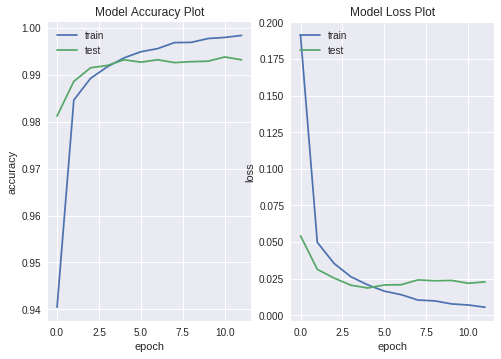

In [0]:
plt.figure()
plt.subplot(121)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model Accuracy Plot')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.subplot(122)
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss Plot')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

####CNN_MNIST_2

Layers =>  conv2D + conv2D + Maxpooling  + Conv2D + conv2D + Maxpooling + Batch Normalization +Flatten + Dense(1024) + Dense(526) + Dense(10)

Padding ==> Valid

Activation ==> Sigmoid

In [0]:
from keras.layers import BatchNormalization

In [0]:
model = Sequential()

In [0]:
model.add(Conv2D(16,(5,5),activation="sigmoid"))
model.add(Conv2D(32,(5,5),activation="sigmoid"))
model.add(MaxPooling2D())

In [0]:
model.add(Conv2D(64,(3,3),activation="sigmoid"))
model.add(Conv2D(128, (3, 3), use_bias=False,activation="sigmoid"))
# took referance from https://www.dlology.com/blog/one-simple-trick-to-train-keras-model-faster-with-batch-normalization/
model.add(BatchNormalization())

In [0]:
model.add(Flatten())
model.add(Dense(1024,activation="sigmoid"))
model.add(Dense(524,activation="sigmoid"))
model.add(Dense(10,activation="softmax"))

In [0]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

In [0]:
history = model.fit(x_train, y_train,batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 239s 4ms/step - loss: 0.6353 - acc: 0.7860 - val_loss: 0.5028 - val_acc: 0.8322
Epoch 2/12
60000/60000 [==============================] - 239s 4ms/step - loss: 0.1180 - acc: 0.9644 - val_loss: 0.1291 - val_acc: 0.9584
Epoch 3/12
60000/60000 [==============================] - 240s 4ms/step - loss: 0.0709 - acc: 0.9786 - val_loss: 0.0813 - val_acc: 0.9743
Epoch 4/12
60000/60000 [==============================] - 237s 4ms/step - loss: 0.0491 - acc: 0.9856 - val_loss: 0.0981 - val_acc: 0.9685
Epoch 5/12
60000/60000 [==============================] - 239s 4ms/step - loss: 0.0370 - acc: 0.9884 - val_loss: 0.0675 - val_acc: 0.9796
Epoch 6/12
60000/60000 [==============================] - 239s 4ms/step - loss: 0.0294 - acc: 0.9910 - val_loss: 0.0587 - val_acc: 0.9801
Epoch 7/12
60000/60000 [==============================] - 238s 4ms/step - loss: 0.0230 - acc: 0.9933 - val_loss: 0.1027 - 

In [0]:
score = model.evaluate(x_test, y_test, verbose=0)

test2_loss = score[0]*100
test2_accuracy = score[1]*100


print('Test loss:', score[0])
print('Test accuracy:', score[1]*100)


Test loss: 0.029902513770171207
Test accuracy: 99.0


Accuracy/Loss plot

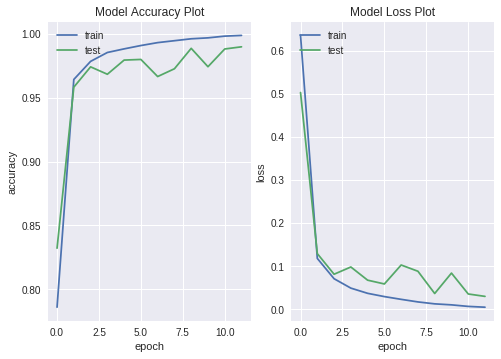

In [0]:
plt.figure()
plt.subplot(121)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model Accuracy Plot')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.subplot(122)
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss Plot')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

####CNN_MNIST_3

Layers => conv2D + conv2D + Maxpooling + Conv2D + conv2D +Dropout +Flatten + Dense(1024) + Dense(526) + Dense(10)

Padding ==> Valid

Activation ==> Sigmoid

In [0]:
model = Sequential()
model.add(Conv2D(16,(5,5),activation="sigmoid"))
model.add(Conv2D(32,(5,5),activation="sigmoid"))
model.add(MaxPooling2D())

In [0]:
model.add(Conv2D(64,(3,3),activation="sigmoid"))
model.add(Conv2D(128, (3, 3),activation="sigmoid"))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(1024,activation="sigmoid"))
model.add(Dense(524,activation="sigmoid"))
model.add(Dense(10,activation="softmax"))


In [0]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

In [0]:
history = model.fit(x_train, y_train,batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 231s 4ms/step - loss: 2.3334 - acc: 0.1031 - val_loss: 2.3617 - val_acc: 0.1135
Epoch 2/12
60000/60000 [==============================] - 230s 4ms/step - loss: 2.3250 - acc: 0.1016 - val_loss: 2.3089 - val_acc: 0.0974
Epoch 3/12
60000/60000 [==============================] - 228s 4ms/step - loss: 2.3148 - acc: 0.1017 - val_loss: 2.3061 - val_acc: 0.1028
Epoch 4/12
60000/60000 [==============================] - 229s 4ms/step - loss: 2.3036 - acc: 0.1084 - val_loss: 2.3021 - val_acc: 0.1135
Epoch 5/12
60000/60000 [==============================] - 230s 4ms/step - loss: 2.3020 - acc: 0.1106 - val_loss: 2.3013 - val_acc: 0.1135
Epoch 6/12
60000/60000 [==============================] - 230s 4ms/step - loss: 2.3016 - acc: 0.1117 - val_loss: 2.3011 - val_acc: 0.1135
Epoch 7/12
60000/60000 [==============================] - 230s 4ms/step - loss: 2.3015 - acc: 0.1115 - val_loss: 2.3013 - 

In [0]:
score = model.evaluate(x_test, y_test, verbose=0)

test3_loss = score[0]*100
test3_accuracy = score[1]*100


print('Test loss:', score[0])
print('Test accuracy:', score[1]*100)


Test loss: 2.3011466354370116
Test accuracy: 11.35


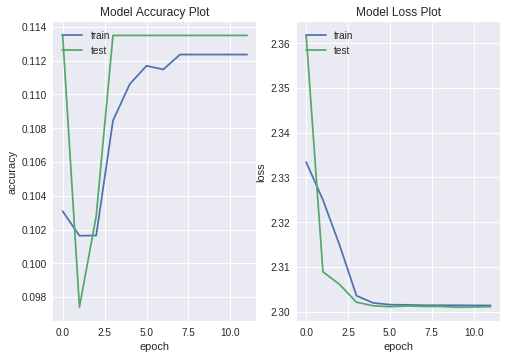

In [0]:
plt.figure()
plt.subplot(121)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model Accuracy Plot')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.subplot(122)
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss Plot')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

####CNN_MNIST_4

Layers => conv2D + conv2D + Maxpooling + Conv2D + conv2D +  Batch Normalization +Flatten + Dense(1024) +Dropout(0.5)+ Dense(524) + Dense(10)

Padding ==> Valid

Activation ==> Sigmoid

In [0]:
model = Sequential()
model.add(Conv2D(16,(5,5),activation="sigmoid"))
model.add(Conv2D(32,(5,5),activation="sigmoid"))
model.add(MaxPooling2D())

In [0]:
model.add(Conv2D(64,(3,3),activation="sigmoid"))
model.add(Conv2D(128, (3, 3),activation="sigmoid"))
model.add(BatchNormalization())

model.add(Flatten())
model.add(Dense(1024,activation="sigmoid"))
model.add(Dropout(0.2))
model.add(Dense(524,activation="sigmoid"))
model.add(Dense(10,activation="softmax"))


In [0]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

In [29]:
history = model.fit(x_train, y_train,batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 242s 4ms/step - loss: 0.5656 - acc: 0.8114 - val_loss: 0.7439 - val_acc: 0.7844
Epoch 2/12
60000/60000 [==============================] - 241s 4ms/step - loss: 0.1249 - acc: 0.9614 - val_loss: 0.0816 - val_acc: 0.9729
Epoch 3/12
60000/60000 [==============================] - 241s 4ms/step - loss: 0.0749 - acc: 0.9775 - val_loss: 0.1489 - val_acc: 0.9509
Epoch 4/12
60000/60000 [==============================] - 240s 4ms/step - loss: 0.0543 - acc: 0.9835 - val_loss: 0.1048 - val_acc: 0.9640
Epoch 5/12
60000/60000 [==============================] - 239s 4ms/step - loss: 0.0418 - acc: 0.9868 - val_loss: 0.0436 - val_acc: 0.9847
Epoch 6/12
60000/60000 [==============================] - 242s 4ms/step - loss: 0.0331 - acc: 0.9896 - val_loss: 0.0588 - val_acc: 0.9807
Epoch 7/12
60000/60000 [==============================] - 243s 4ms/step - loss: 0.0271 - acc: 0.9916 - val_loss: 0.0512 - 

In [30]:
score = model.evaluate(x_test, y_test, verbose=0)

test4_loss = score[0]*100
test4_accuracy = score[1]*100


print('Test loss:', score[0])
print('Test accuracy:', score[1]*100)


Test loss: 0.029612665722063683
Test accuracy: 99.09


In [0]:
plt.figure()
plt.subplot(121)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model Accuracy Plot')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.subplot(122)
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss Plot')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

**Conclusion**

1. Highest accuracy found **99.32 %** in case of model 1
2. Accuracy dropped as number of convolutional layers increase as seen for case 2
3. Model performed worst when batch normalization layer was replaced by Dropout. Train\test error found very high. Model underfitted in case 3

####Summary

In [0]:
from prettytable import PrettyTable
summary = PrettyTable()

In [0]:
summary.field_names = ["Model", "Batch Normalization", "Dropout",  "Test Loss","Test Accuracy"]

In [0]:
summary.add_row(["CNN_MNIST_1","No","Yes (0.5)",test1_loss,test1_accuracy])
summary.add_row(["CNN_MNIST_2","Yes","No",test2_loss,test2_accuracy])
summary.add_row(["CNN_MNIST_3","No","Yes (0.5)",test3_loss,test3_accuracy])
summary.add_row(["CNN_MNIST_4","Yes","Yes (0.2)",test4_loss,test4_accuracy])

In [35]:
print(summary)

+-------------+---------------------+-----------+--------------------+---------------+
|    Model    | Batch Normalization |  Dropout  |     Test Loss      | Test Accuracy |
+-------------+---------------------+-----------+--------------------+---------------+
| CNN_MNIST_1 |          No         | Yes (0.5) |  2.27041470241536  |     99.32     |
| CNN_MNIST_2 |         Yes         |     No    | 2.990251377017121  |      99.0     |
| CNN_MNIST_3 |          No         | Yes (0.5) | 230.11466354370117 |     11.35     |
| CNN_MNIST_4 |         Yes         | Yes (0.2) | 2.9612665722063682 |     99.09     |
+-------------+---------------------+-----------+--------------------+---------------+
+-------------+---------------------+-----------+--------------------+---------------+
|    Model    | Batch Normalization |  Dropout  |     Test Loss      | Test Accuracy |
+-------------+---------------------+-----------+--------------------+---------------+
| CNN_MNIST_1 |          No         | Yes (